# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "./output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [5]:
#test_cities = cities[0:200]
#test_cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
# Define initial url and preferred units
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

# Get data for each city in cities.csv
cities_pd = pd.DataFrame()

cities_pd["City"] = ""
cities_pd["Country"] = ""
cities_pd["Date"] = ""
cities_pd["Lat"] = ""
cities_pd["Lng"] = ""
cities_pd["Cloudiness"] = ""
cities_pd["Humidity"] = ""
cities_pd["Max Temp"] = ""
cities_pd["Wind Speed"] = ""

#cities_pd.rename(columns= {'0':'City'})
#cities_pd.head()

# response = requests.get(query_url + cities[0]).json()
# print(response)
# print(query_url + cities[0])

In [7]:
# Initialize Retrieval and counter
index = 0

print(f"Beginning Data Retrieval")
print("--------------------------")

# Loop through cities and print progress and any skips
# This will also keep track of the number of cities pulled
for city in cities:
    
    response = requests.get(query_url + city).json()
    #print(response)
    #print(query_url + city)
    #print(json.dumps(response, indent=4, sort_keys=True))
              
    try:
        cities_pd.loc[index, 'City'] = response['name']
        cities_pd.loc[index, 'Country'] = response['sys']['country']
        cities_pd.loc[index, 'Date'] = response['dt']
        cities_pd.loc[index, 'Lat'] = response['coord']['lat']
        cities_pd.loc[index, 'Lng'] = response['coord']['lon']
        cities_pd.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_pd.loc[index, 'Humidity'] = response['main']['humidity']
        cities_pd.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_pd.loc[index, 'Wind Speed'] = response['wind']['speed']

        index += 1
        set = (index // 50)
        count = index - (set * 50)
        # if count == 0: count = 50  
        
        print(f"Processing Record {count} of Set {set + 1} | {city}")
        print(query_url + city)
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
print("--------------------------")
print("Data Retrieval Complete")
print("--------------------------")
        

Beginning Data Retrieval
--------------------------
Processing Record 1 of Set 1 | chuy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=chuy
Processing Record 2 of Set 1 | avarua
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=avarua
Processing Record 3 of Set 1 | vaini
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=vaini
Processing Record 4 of Set 1 | lompoc
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lompoc
Processing Record 5 of Set 1 | wattegama
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=wattegama
Processing Record 6 of Set 1 | airai
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=airai
Processing Record 7 of Set 1 | san quintin
http://api.openweat

Processing Record 3 of Set 2 | nguruka
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=nguruka
Processing Record 4 of Set 2 | dabhol
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=dabhol
Processing Record 5 of Set 2 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ilulissat
Processing Record 6 of Set 2 | busselton
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=busselton
Processing Record 7 of Set 2 | hilo
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hilo
Processing Record 8 of Set 2 | mar del plata
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mar del plata
City not found. Skipping...
Processing Record 9 of Set 2 | faanui
http://api.openweather

Processing Record 6 of Set 3 | saint-philippe
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saint-philippe
Processing Record 7 of Set 3 | aasiaat
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=aasiaat
City not found. Skipping...
Processing Record 8 of Set 3 | hannibal
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hannibal
Processing Record 9 of Set 3 | saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saskylakh
Processing Record 10 of Set 3 | ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ponta do sol
Processing Record 11 of Set 3 | tezu
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tezu
Processing Record 12 of Set 3 | newton
http://

City not found. Skipping...
Processing Record 10 of Set 4 | khorol
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=khorol
Processing Record 11 of Set 4 | newport
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=newport
Processing Record 12 of Set 4 | new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=new norfolk
Processing Record 13 of Set 4 | husavik
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=husavik
Processing Record 14 of Set 4 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lorengau
Processing Record 15 of Set 4 | anahuac
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=anahuac
Processing Record 16 of Set 4 | krasnaya gora
http://api.o

Processing Record 13 of Set 5 | burns lake
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=burns lake
Processing Record 14 of Set 5 | ossora
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=ossora
Processing Record 15 of Set 5 | talas
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=talas
Processing Record 16 of Set 5 | pahrump
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=pahrump
Processing Record 17 of Set 5 | san vicente
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=san vicente
Processing Record 18 of Set 5 | marawi
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=marawi
Processing Record 19 of Set 5 | la ronge
http://api.openweathermap.org/data/2.5/weather?

Processing Record 15 of Set 6 | honiara
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=honiara
City not found. Skipping...
Processing Record 16 of Set 6 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=dikson
Processing Record 17 of Set 6 | gobabis
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=gobabis
Processing Record 18 of Set 6 | qixingtai
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=qixingtai
City not found. Skipping...
Processing Record 19 of Set 6 | boa vista
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=boa vista
Processing Record 20 of Set 6 | vestmannaeyjar
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=vestmannaeyjar
Processing Record 

Processing Record 18 of Set 7 | rahuri
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=rahuri
Processing Record 19 of Set 7 | zalantun
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=zalantun
Processing Record 20 of Set 7 | emirdag
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=emirdag
Processing Record 21 of Set 7 | matara
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=matara
Processing Record 22 of Set 7 | tateyama
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tateyama
Processing Record 23 of Set 7 | goderich
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=goderich
Processing Record 24 of Set 7 | karlshamn
http://api.openweathermap.org/data/2.5/weather?app

Processing Record 21 of Set 8 | lingao
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lingao
Processing Record 22 of Set 8 | tapes
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tapes
Processing Record 23 of Set 8 | saldanha
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saldanha
Processing Record 24 of Set 8 | woodward
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=woodward
Processing Record 25 of Set 8 | lata
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=lata
City not found. Skipping...
Processing Record 26 of Set 8 | muli
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=muli
City not found. Skipping...
Processing Record 27 of Set 8 | opuwo
http://api.ope

Processing Record 24 of Set 9 | batagay
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=batagay
Processing Record 25 of Set 9 | santa rosa
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=santa rosa
Processing Record 26 of Set 9 | bloomington
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=bloomington
Processing Record 27 of Set 9 | tazovskiy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=tazovskiy
City not found. Skipping...
Processing Record 28 of Set 9 | saint-jean-de-braye
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=saint-jean-de-braye
Processing Record 29 of Set 9 | mersing
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=mersing
Processing Record 30 of 

Processing Record 27 of Set 10 | sao francisco
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=sao francisco
Processing Record 28 of Set 10 | dangriga
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=dangriga
Processing Record 29 of Set 10 | quang ngai
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=quang ngai
Processing Record 30 of Set 10 | chara
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=chara
Processing Record 31 of Set 10 | valparai
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=valparai
Processing Record 32 of Set 10 | boras
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=boras
Processing Record 33 of Set 10 | raahe
http://api.openweathermap.org/data/

Processing Record 30 of Set 11 | malanje
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=malanje
Processing Record 31 of Set 11 | hornepayne
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=hornepayne
City not found. Skipping...
Processing Record 32 of Set 11 | changli
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=changli
Processing Record 33 of Set 11 | yertarskiy
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=yertarskiy
Processing Record 34 of Set 11 | muzaffarpur
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=muzaffarpur
Processing Record 35 of Set 11 | deep river
http://api.openweathermap.org/data/2.5/weather?appid=1c984bd95bd490cd25edadb62a7df0b7&units=imperial&q=deep river
Processing Record 36 of Set 11 | m

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
cities_pd.head()

,City,Country,Date,Lat,Lng,Cloudiness,Humidity,Max Temp,Wind Speed
0,Chuy,UY,1554057749,-33.69,-53.46,0,93,77.2,8.19
1,Avarua,CK,1554055200,-21.21,-159.78,92,94,77,9.17
2,Vaini,IN,1554058011,15.34,74.49,0,83,72.7,3.38
3,Lompoc,US,1554057708,34.64,-120.46,1,52,75.99,8.75
4,Wattegama,LK,1554058011,7.35,80.68,8,92,69.37,2.93


In [9]:
cities_pd.to_csv("./output_data/Cities_Weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

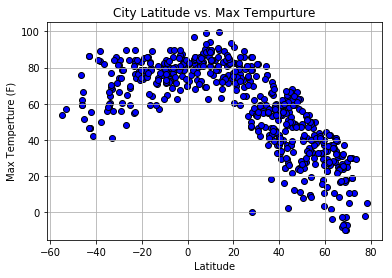

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(cities_pd['Lat'], cities_pd['Max Temp'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Max Tempurture')
plt.xlabel('Latitude')
plt.ylabel('Max Temperture (F)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Max_Tempurture.png')

#### Latitude vs. Humidity Plot

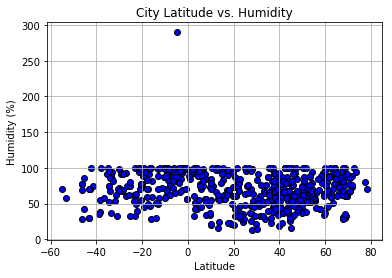

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(cities_pd['Lat'], cities_pd['Humidity'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Humidity.png')

#### Latitude vs. Cloudiness Plot

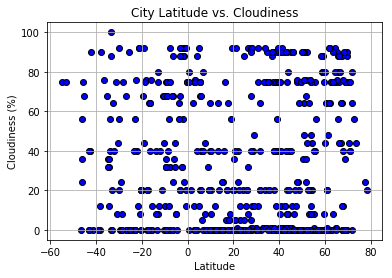

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(cities_pd['Lat'], cities_pd['Cloudiness'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Cloudiness.png')

#### Latitude vs. Wind Speed Plot

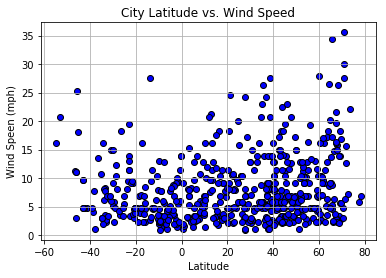

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(cities_pd['Lat'], cities_pd['Wind Speed'], 
            marker="o", facecolors = 'blue', edgecolors="black")
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speen (mph)')
plt.grid()
plt.show()
plt.savefig('./Images/City_Latitude_vs_Wind_Speed.png')